In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import mpl_finance as fin

We consider a stock price at a given point in time as a vector

$$x_i = \begin{pmatrix}
    low \\ 
    high \\ 
    open \\ 
    close \\
    vwap \\
    volume
\end{pmatrix}$$

And a collection of historical prices for a stock as a matrix

$$\bf{x} = \begin{pmatrix}
    x_0^T \\ 
    x_1^T \\
    . \\
    . \\
    . \\
    x_n^T
\end{pmatrix}
=
\begin{pmatrix}
    low(x_0) & high(x_0) & open(x_0) & close(x_0) & vwap(x_0) & volume(x_0) \\
    low(x_1) & high(x_1) & open(x_1) & close(x_1) & vwap(x_1) & volume(x_1) \\
    . & . & . & . & . & . \\
    low(x_n) & high(x_n) & open(x_n) & close(x_n) & vwap(x_n) & volume(x_n) \\
\end{pmatrix}
$$

Firstly, this keeps all data well organized and contained within a single object. Secondly, it allows for studies to be described in the context of linear algebra operations.

For instance, the computation of $$(high + low + open + close) / 4$$ can be described as

$$\frac{(high + low + open + close)}{4} = \bf{x} \cdot \frac{1}{4} \begin{pmatrix}
  1 \\
  1 \\
  1 \\
  1 \\
  0 \\
  0
\end{pmatrix}
$$

In [2]:
# Compute (high + low + open + close) / 4 using matrix operations
data = np.arange(0, 36).reshape(6,6)
hloc = np.array([1, 1, 1, 1, 0, 0]).reshape(6, 1) / 4

data
hloc
data @ hloc

array([[ 1.5],
       [ 7.5],
       [13.5],
       [19.5],
       [25.5],
       [31.5]])

In this case we can compute the desired result through matrix operations rather than having to write a complicated algorithm. 

We also have the flexibility to apply an operation to multiple features of a price history at once. Suppose that we want to compute a gradient to analyze changes in each price feature over time. We can compute a single gradient that will be valid for each feature.

In [3]:
np.gradient(data, axis=0)

array([[6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.],
       [6., 6., 6., 6., 6., 6.]])

## Moving Averages

We can describe the n period simple moving average and exponential moving average as matrix operators

## Divergence

We can easily determine correlations between past prices and study values to search for divergences between the study and price during future trading. Assuming that the input data is a N by 6 matrix, the transform must have dimensions 6xN


In [4]:
data = np.arange(0, 42).reshape(7,6)
data
shape = data.shape[::-1]
sma = np.ones(shape) - np.tri(shape[0], M=shape[-1], k=-1)
sma

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.]])

In [5]:
data = np.arange(0, 36*3, 3).reshape(6,6)
study = data
data = data * 2
study[3, 0] = 58
div = np.diff(data, axis=0) / np.diff(study, axis=0)

data
study
div
np.mean(div, axis=0)
np.std(div, axis=0)

array([0.30004216, 0.        , 0.        , 0.        , 0.        ,
       0.        ])

The resultant array tells us that on average a two fold increase in the value of a study should be associated with a four fold increase in price. We can apply this to future values of the study and price to note when the two diverge. Divergence of price and study trends may indicate that the price trend is nearing a reversal

## Pandas

We can use pandas to effectively managed labeled data. Extraction of Numpy arrays from data frames is simple

In [6]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

df = pd.read_json('/home/tidal/Dropbox/Software/trader/data/aapl-1d1m.json')
df

,average,changeOverTime,close,date,high,label,low,marketAverage,marketChangeOverTime,marketClose,...,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,minute,notional,numberOfTrades,open,volume
0,229.278,0.000000,229.510,20180905,229.510,09:30 AM,228.940,229.092,0.000000,229.510,...,228.900,2.351586e+08,2930,228.990,1026482,09:30,1018221.380,43,228.980,4441
1,229.549,0.001182,229.420,20180905,229.615,09:31 AM,229.420,229.530,0.001912,229.340,...,229.000,5.552942e+07,1723,229.510,241927,09:31,992572.225,33,229.510,4324
2,229.065,-0.000929,229.020,20180905,229.340,09:32 AM,228.970,229.112,0.000087,229.010,...,228.940,3.303847e+07,1108,229.360,144202,09:32,888545.195,37,229.340,3879
3,228.895,-0.001670,228.770,20180905,229.070,09:33 AM,228.700,228.895,-0.000860,228.765,...,228.700,4.748622e+07,1463,229.003,207458,09:33,776641.780,40,229.030,3393
4,228.576,-0.003062,228.460,20180905,228.775,09:34 AM,228.460,228.621,-0.002056,228.460,...,228.450,4.165439e+07,1597,228.761,182198,09:34,1321625.410,44,228.750,5782
5,228.770,-0.002216,229.060,20180905,229.070,09:35 AM,228.480,228.790,-0.001318,229.060,...,228.460,4.303427e+07,1703,228.460,188095,09:35,1557464.915,78,228.480,6808
6,228.843,-0.001897,228.730,20180905,229.070,09:36 AM,228.690,228.801,-0.001270,228.730,...,228.660,2.920215e+07,1106,229.030,127631,09:36,955418.350,49,229.030,4175
7,228.639,-0.002787,228.550,20180905,228.890,09:37 AM,228.420,228.629,-0.002021,228.590,...,228.390,3.581196e+07,1404,228.721,156638,09:37,839105.180,44,228.775,3670
8,228.536,-0.003236,228.420,20180905,228.660,09:38 AM,228.420,228.519,-0.002501,228.420,...,228.400,3.051076e+07,932,228.590,133515,09:38,729943.870,38,228.610,3194
9,228.528,-0.003271,228.490,20180905,228.610,09:39 AM,228.400,228.495,-0.002606,228.510,...,228.360,2.269212e+07,897,228.410,99311,09:39,966446.405,35,228.410,4229


In [7]:
df.close

0      229.510
1      229.420
2      229.020
3      228.770
4      228.460
5      229.060
6      228.730
7      228.550
8      228.420
9      228.490
10     228.090
11     228.330
12     228.450
13     228.490
14     228.610
15     228.720
16     228.645
17     228.680
18     228.240
19     228.420
20     228.200
21     228.150
22     227.730
23     227.660
24     227.750
25     227.500
26     227.310
27     227.070
28     226.850
29     226.410
        ...   
360    227.080
361    226.990
362    226.980
363    227.060
364    227.100
365    227.070
366    226.930
367    226.790
368    226.730
369    226.890
370    226.595
371    226.645
372    226.760
373    226.650
374    226.550
375    226.480
376    226.550
377    226.480
378    226.455
379    226.300
380    226.360
381    226.340
382    226.470
383    226.360
384    226.350
385    226.460
386    226.540
387    226.530
388    226.640
389    226.710
Name: close, Length: 390, dtype: float64

Data selected from Pandas dataframes as numpy arrays can be operated on

## Plotting

More effective plotting can be achieved by grouping functionality into methods

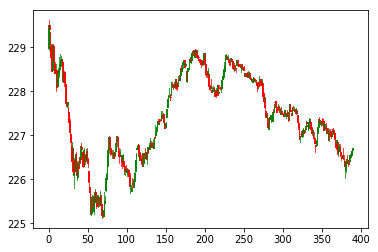

In [8]:
def plot_chart(df, lines, scatters, num=None, **kwargs):
    # Create subplot and draw candles
    ax = plt.subplot()
    fin.candlestick2_ohlc(ax, 
                          df.open.values, 
                          df.high.values, 
                          df.low.values, 
                          df.close.values, 
                          width=1, 
                      colorup='g', colordown='r', alpha=0.75)
    
    for study in lines:
        plt.plot(study[:,0], study[:,1], linestyle='-')
        
    for study in scatters:
        plt.plot(study[:,0], study[:,1], linestyle='none', marker='o')
        
    if num:
        plt.xlim([len(df.close.values)-num, len(df.close.values)])
    plt.show()
    
plot_chart(df, [], [])

## Support and Resistance

We can use peak detection algorithms to identify support and resistance levels. It would be nice to have a strength metric

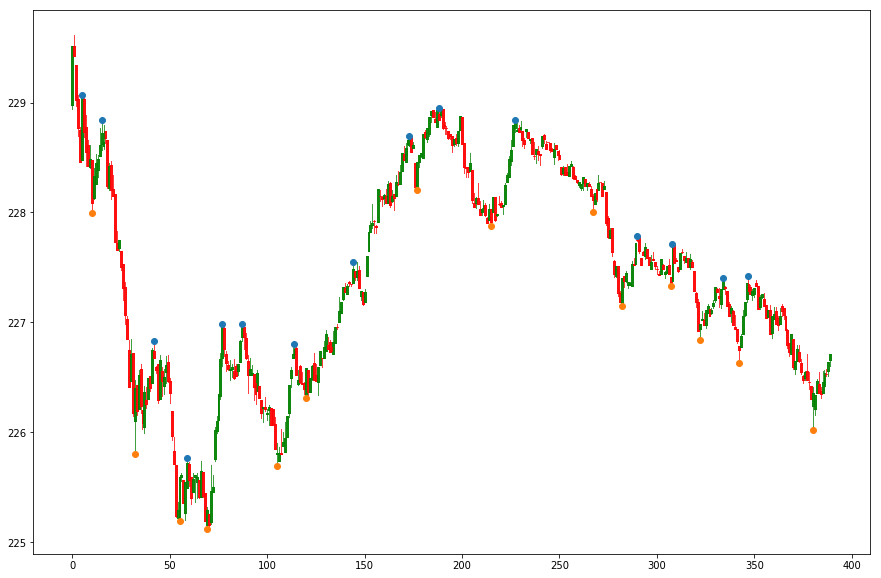

In [9]:

plt.rcParams["figure.figsize"] = (15,10)

x = np.arange(0, len(df.close))
r = np.arange(1, 10)
h = 0.00
w = 2
p = 0.25 # 0.2
d=4


highs = sig.find_peaks(df.high.values, threshold=h, width=w, prominence=p, distance=d)
lows = sig.find_peaks(df.low.values*-1, threshold=h, width=w, prominence=p, distance=d)

high_coords = np.column_stack((highs[0], df.high.values[highs[0]]))
low_coords = np.column_stack((lows[0], df.low.values[lows[0]]))
plot_chart(df, [], [high_coords, low_coords])


## Averages

Many other studies rely on calculation of moving averages. The methods use to calculate these averages should be parameterized to facilitate tweaking of calculation methods, such as the number of periods in an EMA. Furthermore, describing these averages as linear transformations would be advantageous as it would facilitate efficient calculation on multiple price metrics.

At a fundamental level, the idea of a moving average is described mathematically by the convolution operation. This is supported by numpy

## Simple

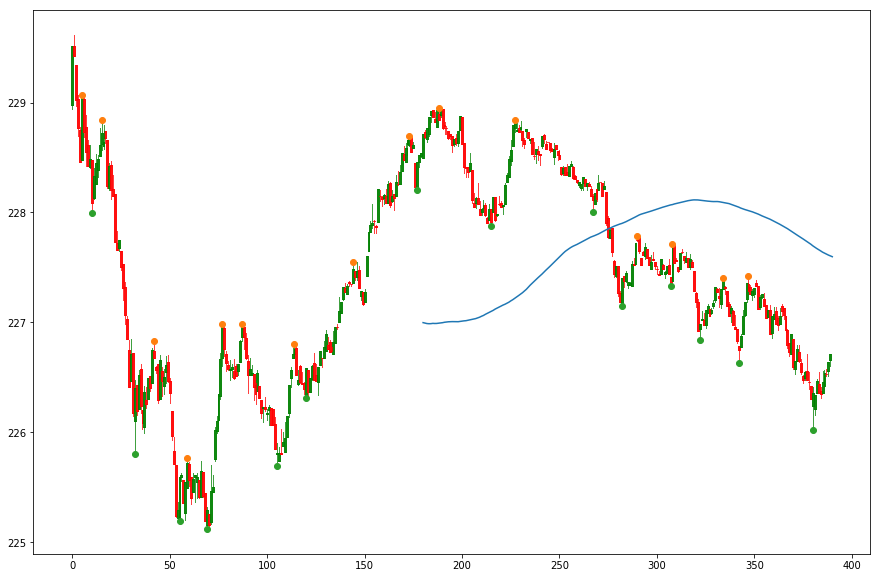

In [10]:
# Number of points to include in the moving average
periods = 180

# 'valid', 'full', 'same' -> valid produces sensible results
mode = 'valid'

sma = sig.convolve(df.close.values, np.ones(periods) / periods, mode='valid')

# Vectorization is possible so operation can be applied to multidimensional matrices
#convolve = np.vectorize(np.convolve, signature='(n),(m)->(k)')
#sma = convolve(df.close.values, np.ones(periods) / periods, mode='valid')
sma = np.column_stack((np.arange(periods, periods+len(sma)), sma))
# Plot
plot_chart(df, [sma],[high_coords, low_coords])

### Exponential

The EMA cannot be calculated as a convolution, as the N period EMA is not actually restricted to N inputs. Rather, the N is used in the calculation of a weighting constant that will be applied to any price preceeding the current price.

$$\alpha = \frac{2}{N+1}$$

$$EMA_i = \alpha P_i + (1 - \alpha) EMA_{i-1}$$ 

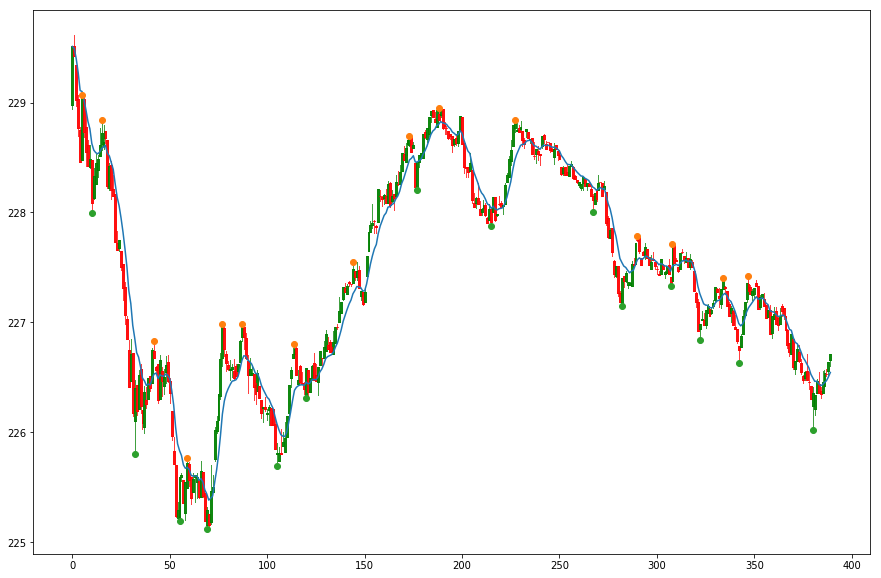

In [11]:
periods = 9

def get_ema(prices, periods):
    alpha = 2 / (periods + 1)
    result = np.empty(len(prices))
    result[0] = prices[0]
    
    for pos in range(1, len(prices)):
        result[pos] = alpha * prices[pos] + (1-alpha) * result[pos-1]
    return result

ema = get_ema(df.close.values, periods)
ema = np.column_stack((np.arange(0, len(ema)), ema))
plot_chart(df, [ema],[high_coords, low_coords])

## Wilders
The wilders average type is simply an EMA where periods N=14

In [40]:
def wilders(data):
    return get_ema(data, 14)

## Local Extrema
We can identify extremas in studies, however these are more useful for larger consolidation periods

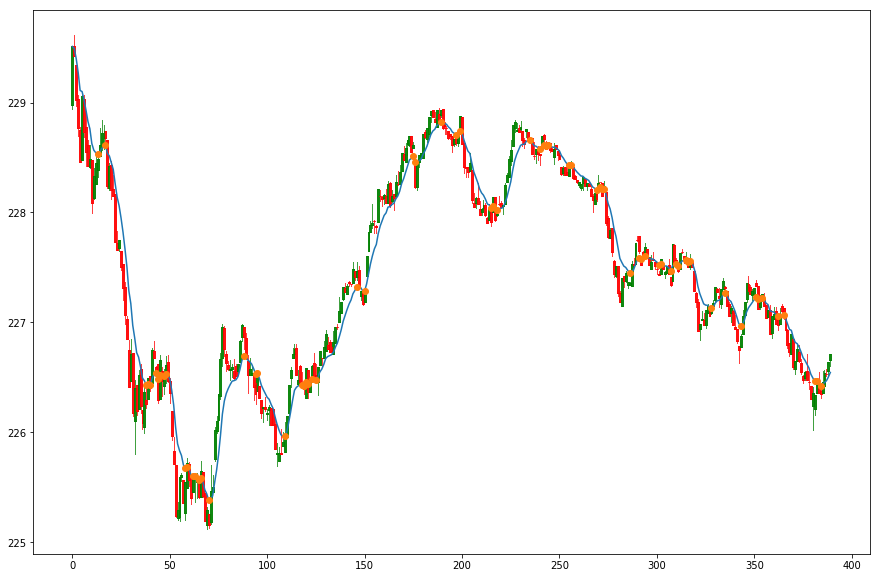

In [12]:
peaks = sig.argrelmax(ema[:,1])[0]
troughs = sig.argrelmin(ema[:,1])[0]

peaks = np.column_stack((peaks, ema[peaks, 1]))
troughs = np.column_stack((troughs, ema[troughs, 1]))
plot_chart(df, [ema],[np.vstack((peaks, troughs))])

## RSI

We can calculate RSI using

$$RSI = 100 - \frac{100}{1 - RS}$$

where RS is given by the average gain of up trends / the average loss of down trends

In [53]:

# Create a vector of deltas between each tick and split by direction

delta = np.diff(df.close.values)
ups = np.array(delta >= 0)
downs = np.array(delta < 0)
ups
downs

    

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True,  True, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,

In [41]:
def get_rs(data, periods):
    # Create a vector of deltas between each tick and split by direction
    delta = np.diff(data)
    ups = np.array(delta >= 0)
    downs = delta[delta < 0]
    
    numer = wilders(ups).sum()
    denom = wilders(downs).sum()
    return numer / denom
    
    
    
def get_rsi(data, periods):
    return 100-100/(1-get_rs(data, periods))

get_rsi(df.close.values, 9)

51.84297090558811

In [47]:
test = df.close.values 
f = test > 227
print(f)
test[f]

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

array([229.51 , 229.42 , 229.02 , 228.77 , 228.46 , 229.06 , 228.73 ,
       228.55 , 228.42 , 228.49 , 228.09 , 228.33 , 228.45 , 228.49 ,
       228.61 , 228.72 , 228.645, 228.68 , 228.24 , 228.42 , 228.2  ,
       228.15 , 227.73 , 227.66 , 227.75 , 227.5  , 227.31 , 227.07 ,
       227.1  , 227.19 , 227.32 , 227.28 , 227.33 , 227.36 , 227.35 ,
       227.49 , 227.41 , 227.47 , 227.31 , 227.29 , 227.17 , 227.28 ,
       227.6  , 227.82 , 227.89 , 227.9  , 227.92 , 227.87 , 228.21 ,
       228.15 , 228.12 , 228.16 , 228.09 , 228.26 , 228.07 , 228.15 ,
       228.13 , 228.28 , 228.255, 228.37 , 228.54 , 228.48 , 228.59 ,
       228.66 , 228.7  , 228.55 , 228.61 , 228.23 , 228.46 , 228.52 ,
       228.54 , 228.71 , 228.69 , 228.77 , 228.87 , 228.92 , 228.865,
       228.82 , 228.93 , 228.84 , 228.93 , 228.77 , 228.79 , 228.77 ,
       228.68 , 228.7  , 228.61 , 228.67 , 228.635, 228.74 , 228.88 ,
       228.62 , 228.41 , 228.4  , 228.37 , 228.45 , 228.11 , 228.05 ,
       228.13 , 228.

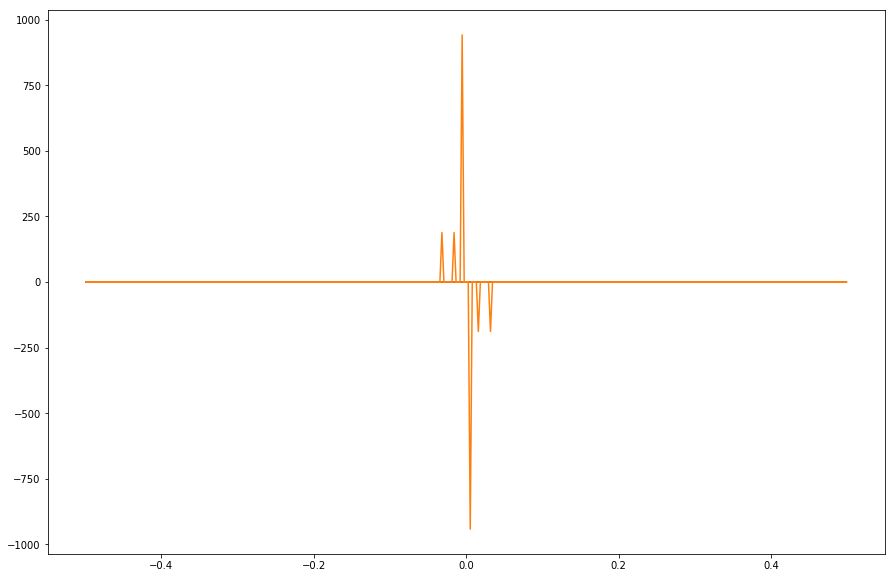

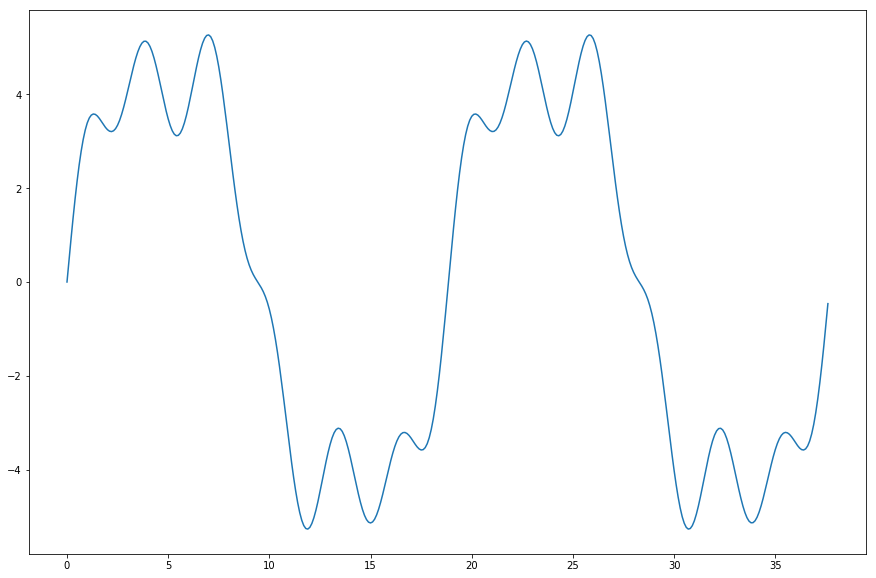

In [38]:
rands = np.arange(0, 12*np.pi, .1)
randsy = np.sin(rands) + np.sin(2 * rands) + 5*np.sin(rands / 3)
res = np.fft.fft(randsy)
bins = np.fft.fftfreq(rands.shape[-1])
plt.plot(bins, res.real, bins, res.imag)
plt.show()

plt.plot(rands, randsy)